In [ ]:
# https://www.kaggle.com/c/nyc-taxi-trip-duration/data

!ls Datasets/New\ York\ Taxi

In [4]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

df = pd.DataFrame(pd.read_csv('Datasets/New York Taxi/train.csv', parse_dates=['pickup_datetime', 'dropoff_datetime']))
df.sort_values('pickup_datetime', inplace=True)

df = df.iloc[:10000,:]
df = df[(df.passenger_count != 0) & (df.passenger_count < 8)]

df.loc[:,'trip_duration'] = df.loc[:,'trip_duration'].div(60)
df = df[df.trip_duration <= 400]

df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
96469,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.981743,40.719158,-73.938828,40.829182,N,14.150000
223872,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.985085,40.747166,-73.958038,40.717491,N,21.566667
713067,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.965279,40.801041,-73.947479,40.815170,N,6.800000
652463,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.982292,40.751331,-73.991341,40.750340,N,4.666667
722901,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.970108,40.759800,-73.989357,40.742989,N,12.266667


In [5]:
import geopy.distance

df['distance'] = df.apply(lambda x: geopy.distance.vincenty(
                            (x['pickup_longitude'], x['pickup_latitude']),
                            (x['dropoff_longitude'], x['dropoff_latitude'])).miles, axis=1 )

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
96469,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.981743,40.719158,-73.938828,40.829182,N,14.150000,3.647850
223872,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.985085,40.747166,-73.958038,40.717491,N,21.566667,1.959920
713067,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.965279,40.801041,-73.947479,40.815170,N,6.800000,1.263772
652463,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.982292,40.751331,-73.991341,40.750340,N,4.666667,0.627799
722901,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.970108,40.759800,-73.989357,40.742989,N,12.266667,1.373183


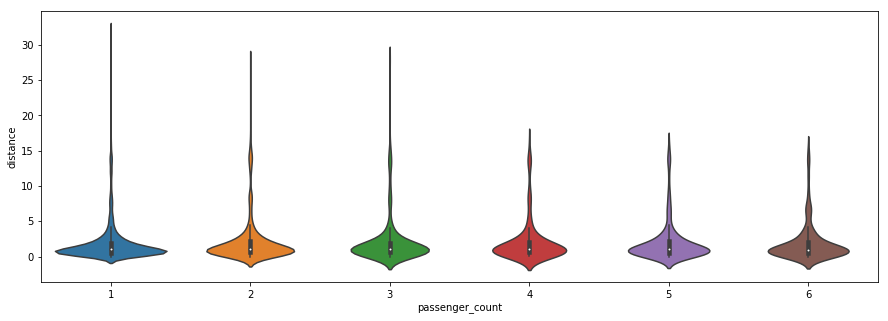

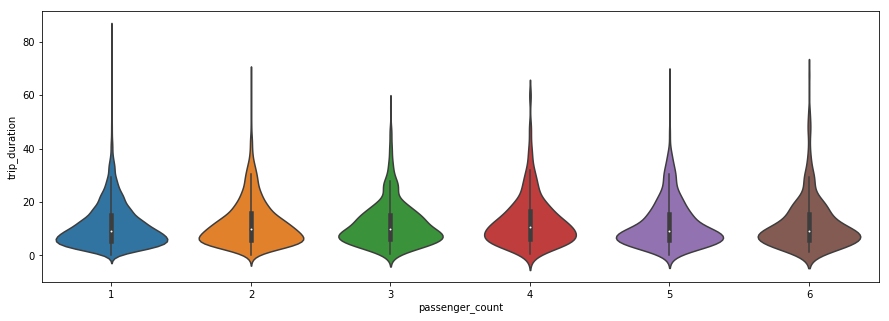

In [35]:
# display(df.describe())

# display(df.quantile(q=np.linspace(0,1,100)))

plt.figure(figsize=(15,5))
sns.violinplot(x='passenger_count',y='distance',data=df)
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='passenger_count',y='trip_duration',data=df)
plt.show()

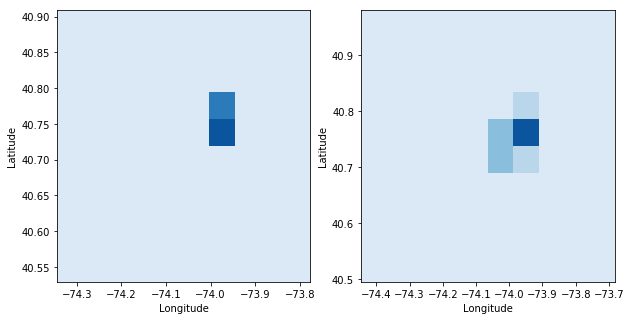

In [8]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette(palette='Blues').as_hex())

f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist2d(df['pickup_longitude'], df['pickup_latitude'], cmap=cmap)
ax[1].hist2d(df['dropoff_longitude'], df['dropoff_latitude'], cmap=cmap)

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

plt.show()

In [9]:
import numpy as np

cmapB = ListedColormap(sns.color_palette(palette='Blues', n_colors=1).as_hex())
cmapR = ListedColormap(sns.color_palette(palette='Reds', n_colors=2).as_hex())

pickup = list([df['pickup_longitude'].iloc[i], df['pickup_latitude'].iloc[i]] for i in range(len(df)))
dropoff = list([df['dropoff_longitude'].iloc[i], df['dropoff_latitude'].iloc[i]] for i in range(len(df)))

df['pickup'] = pickup
df['dropoff'] = dropoff

display(df.head())

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup,dropoff
96469,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.981743,40.719158,-73.938828,40.829182,N,14.150000,3.647850,"[-73.9817428589, 40.7191581726]","[-73.9388275146, 40.8291816711]"
223872,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.985085,40.747166,-73.958038,40.717491,N,21.566667,1.959920,"[-73.9850845337, 40.7471656799]","[-73.9580383301, 40.7174911499]"
713067,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.965279,40.801041,-73.947479,40.815170,N,6.800000,1.263772,"[-73.9652786255, 40.8010406494]","[-73.947479248, 40.8151702881]"
652463,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.982292,40.751331,-73.991341,40.750340,N,4.666667,0.627799,"[-73.9822921753, 40.7513313293]","[-73.9913406372, 40.7503395081]"
722901,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.970108,40.759800,-73.989357,40.742989,N,12.266667,1.373183,"[-73.9701080322, 40.7597999573]","[-73.9893569946, 40.7429885864]"


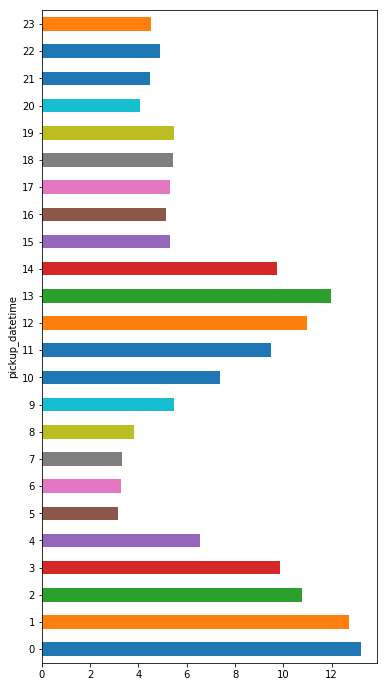

In [10]:
plt.figure(figsize=(6,12))

df.groupby([df['pickup_datetime'].dt.hour]).count()['trip_duration'].div(60).plot(kind="barh",)

plt.show()

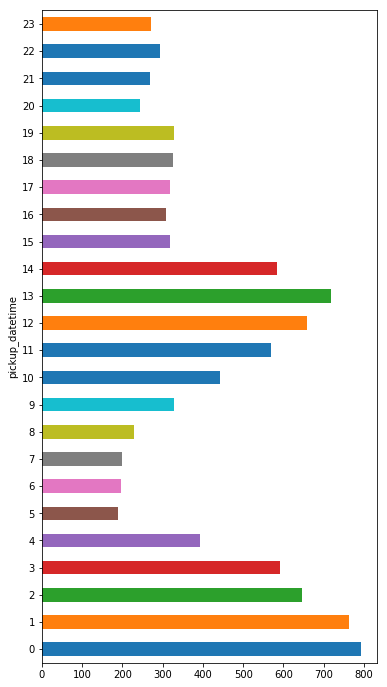

In [11]:
plt.figure(figsize=(6,12))

df.groupby([df['pickup_datetime'].dt.hour]).count()['distance'].plot(kind="barh",)

plt.show()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup,dropoff,pickup_time_int,dropoff_time_int
96469,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.981743,40.719158,-73.938828,40.829182,N,14.15,3.64785,"[-73.9817428589, 40.7191581726]","[-73.9388275146, 40.8291816711]",0.0,0.233333


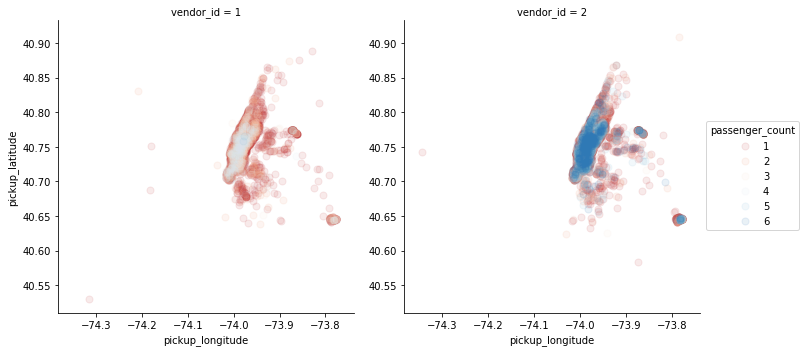

In [26]:
display(df.head(1))

df['pickup_time_int'] = df['pickup_datetime'].dt.hour + df['pickup_datetime'].dt.minute/60.
df['dropoff_time_int'] = df['dropoff_datetime'].dt.hour + df['dropoff_datetime'].dt.minute/60.


sns.lmplot(
    x='pickup_longitude',
    y='pickup_latitude',
    data=df,
    col='vendor_id',
    hue='passenger_count',
    fit_reg=False,
    palette=sns.color_palette('RdBu'),
    scatter_kws={"s":50,'alpha':0.1,'marker':'o'}
)

plt.show()



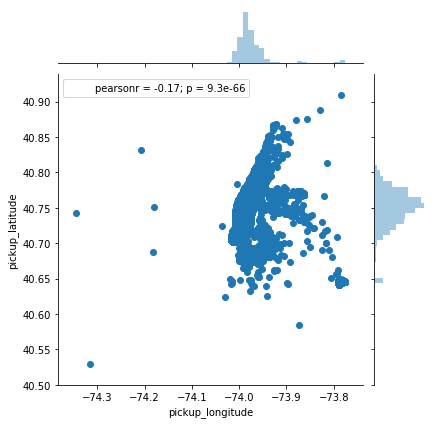

In [36]:
plt.figure(figsize=(10,10))

ax = sns.jointplot(df['pickup_longitude'], 
              df['pickup_latitude'],
              kind='scatter',
             )

plt.show()